## Table of Contents
1. [Load Data](#Load-Data-And-Analysis)
2. [Preprocessing](#preprocessing)
3. [Model Selection](#model-selection)
4. [Visualization](#visualization)
5. [Feed Forward Neural Network](#Feed-Forward-Neural-Network)
6. [Summary & Key Insights](#Notebook-summary-&-key-insights)

# Load Data And Analysis 

In [1]:
import kagglehub

path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\AIJimmy\.cache\kagglehub\datasets\amananandrai\ag-news-classification-dataset\versions\2


In [2]:
import pandas as pd

train_df = pd.read_csv(path + "/train.csv")
test_df = pd.read_csv(path + "/test.csv")
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [4]:
print("value counts:", train_df['Class Index'].value_counts())
print("----------------------------------------")
print("Missing values:", train_df.isnull().sum())
print("----------------------------------------")
print("Dataset shape:", train_df.shape)
print("----------------------------------------")
print("info:", train_df.info())

value counts: Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64
----------------------------------------
Missing values: Class Index    0
Title          0
Description    0
dtype: int64
----------------------------------------
Dataset shape: (120000, 3)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
info: None


In [5]:
print("value counts:", test_df['Class Index'].value_counts())
print("----------------------------------------")
print("Missing values:", test_df.isnull().sum())
print("----------------------------------------")
print("Dataset shape:", test_df.shape)
print("----------------------------------------")
print("info:", test_df.info())

value counts: Class Index
3    1900
4    1900
2    1900
1    1900
Name: count, dtype: int64
----------------------------------------
Missing values: Class Index    0
Title          0
Description    0
dtype: int64
----------------------------------------
Dataset shape: (7600, 3)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.2+ KB
info: None


In [6]:
all_text = ' '.join(train_df['Title'].values + train_df['Description'].values)
unique_chars = set(all_text)
print("Unique characters:", sorted(unique_chars))
print("Number of unique characters:", len(unique_chars))
train_df.head()

Unique characters: [' ', '!', '"', '#', '$', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 82


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# Preprocessing

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AIJimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from num2words import num2words
from nltk.corpus import wordnet
import contractions
from nltk.corpus import stopwords
import re 

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [10]:
def preprocess_text(text):
    text = contractions.fix(text)
    text = text.replace('.', ' . ')
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    text = "".join(num2words(int(word)) if word.isdigit() else word for word in text)
    word_tokens = word_tokenize(text)
    text = [w for w in word_tokens if not w in stop_words]
    tagged = nltk.tag.pos_tag(text)
    lemmatized_words = []

    for word, tag in tagged:
        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN
        lemmatized_words.append(lemmatizer.lemmatize(word, pos=wordnet_pos))
    return ' '.join(lemmatized_words)

In [11]:
train_df['Original_Text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['Original_Text'] = test_df['Title'] + ' ' + test_df['Description']

train_df["Title"]= train_df["Title"].apply(preprocess_text)
train_df["Description"]= train_df["Description"].apply(preprocess_text)
test_df["Title"]= test_df["Title"].apply(preprocess_text)
test_df["Description"]= test_df["Description"].apply(preprocess_text)

In [12]:
train_df.head()

,Class Index,Title,Description,Original_Text
0,3,Wall St Bears Claw Back Into Black Reuters,Reuters Short seller Wall Street dwindle band ...,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace Reuters,Reuters Private investment firm Carlyle Group ...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil Economy Cloud Stocks Outlook Reuters,Reuters Soaring crude price plus worry economy...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports Main Southern Pipeline ...,Reuters Authorities halt oil export flow main ...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,Oil price soar time record pose new menace US ...,AFP Tearaway world oil price toppling record s...,"Oil prices soar to all-time record, posing new..."


In [13]:
all_text = ' '.join(train_df['Title'].values + train_df['Description'].values)
unique_chars = set(all_text)
print("Unique characters:", sorted(unique_chars))
print("Number of unique characters:", len(unique_chars))
train_df.head()

Unique characters: [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 53


,Class Index,Title,Description,Original_Text
0,3,Wall St Bears Claw Back Into Black Reuters,Reuters Short seller Wall Street dwindle band ...,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace Reuters,Reuters Private investment firm Carlyle Group ...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil Economy Cloud Stocks Outlook Reuters,Reuters Soaring crude price plus worry economy...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports Main Southern Pipeline ...,Reuters Authorities halt oil export flow main ...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,Oil price soar time record pose new menace US ...,AFP Tearaway world oil price toppling record s...,"Oil prices soar to all-time record, posing new..."


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

class_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

vectorizer = TfidfVectorizer()
train_df['Text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['Text'] = test_df['Title'] + ' ' + test_df['Description']

train_text_vectors = vectorizer.fit_transform(train_df['Text'])
test_text_vectors = vectorizer.transform(test_df['Text'])

X_train_full = train_text_vectors
y_train_full = train_df['Class Index']

X_test = test_text_vectors
y_test = test_df['Class Index']

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Model selection

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

models_and_params = [
    {
        'name' : 'Logistic Regression',
        'model' : LogisticRegression(),
        'params' : {
            'classifier__C' : [ 0.1, 1, 10],
            'classifier__max_iter' : [200],
            'classifier__solver': ['newton-cg'],
            'classifier__multi_class': ['ovr']
        }
    },
    {
        'name': 'LightGBM',
        'model': lgb.LGBMClassifier(),
        'params': {
            'classifier__boosting_type': ['gbdt'],
            'classifier__objective': ['multiclass'],
            'classifier__num_class': [4],
            'classifier__eval_data': [(X_val, y_val)],
            'classifier__metric': ['multi_logloss'],
            'classifier__verbose': [-1],
            'classifier__learning_rate': [0.05],
            'classifier__n_estimators': [1000],          
            'classifier__num_leaves': [31],              
            'classifier__max_depth': [-1],               
            'classifier__min_child_samples': [20],       
            'classifier__subsample': [0.8],              
            'classifier__colsample_bytree': [0.8],       
            'classifier__reg_alpha': [0.1],              
            'classifier__reg_lambda': [0.1],             
            'classifier__random_state': [42],
        }
    },

]

for model_info in models_and_params:
    model = Pipeline(
        steps=[('classifier', model_info['model'])]
    )
    grid_search = GridSearchCV(model, model_info['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_info['name']}: {grid_search.best_params_}")
    model_info['best_model'] = grid_search.best_estimator_
for model_info in models_and_params:
    print(f"Evaluating {model_info['name']}")
    y_pred = model_info['best_model'].predict(X_test)
    print(classification_report(y_test, y_pred, target_names=class_labels))


Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__max_iter': 200, 'classifier__multi_class': 'ovr', 'classifier__solver': 'newton-cg'}
Best parameters for LightGBM: {'classifier__boosting_type': 'gbdt', 'classifier__colsample_bytree': 0.8, 'classifier__eval_data': (<24000x60689 sparse matrix of type '<class 'numpy.float64'>'
	with 569923 stored elements in Compressed Sparse Row format>, 112486    3
109163    2
6638      3
3996      3
39522     1
         ..
105468    2
90241     2
17201     2
70437     2
28320     4
Name: Class Index, Length: 24000, dtype: int64), 'classifier__learning_rate': 0.05, 'classifier__max_depth': -1, 'classifier__metric': 'multi_logloss', 'classifier__min_child_samples': 20, 'classifier__n_estimators': 1000, 'classifier__num_class': 4, 'classifier__num_leaves': 31, 'classifier__objective': 'multiclass', 'classifier__random_state': 42, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.1, 'classifier__subsample': 0.8, 'classifi

In [16]:
clf = models_and_params[0]["best_model"]
best_estimator = clf.named_steps['classifier']
coefs = best_estimator.coef_
coefs = coefs.ravel()
Num_of_features = 30
feature_names = vectorizer.get_feature_names_out()
pairs = list(zip(feature_names, coefs))
top_pos = sorted(pairs, key=lambda x: x[1], reverse=True)[:Num_of_features]
top_neg = sorted(pairs, key=lambda x: x[1])[:Num_of_features]
print("Top positive features:", top_pos)
print("Top negative features:", top_neg)

Top positive features: [('afp', 11.957577656598083), ('arafat', 10.84711339536819), ('hostage', 10.621803854665785), ('iraqi', 9.532581960459988), ('iraq', 9.280225144678232), ('palestinian', 9.115819728773594), ('darfur', 8.997840496349474), ('afghan', 8.401522479847747), ('iran', 8.357612224746157), ('troop', 8.324874826584931), ('prince', 8.071965972746863), ('fallujah', 7.924587657636481), ('press', 7.889102925181708), ('un', 7.784465379210726), ('military', 7.781014508153422), ('iraqis', 7.673283961720515), ('terrorism', 7.5153136428535445), ('palestinians', 7.506273529895834), ('canadian', 7.220652669436367), ('kashmir', 7.132720749423195), ('leader', 7.0915667455955615), ('kill', 7.07448653084077), ('sudan', 6.995450731388321), ('saddam', 6.8450109172008995), ('afghanistan', 6.780427722986825), ('nuclear', 6.646314693727546), ('beslan', 6.644966601654081), ('israel', 6.453321504364519), ('president', 6.430495019480452), ('singer', 6.422777829639051)]
Top negative features: [('in

In [17]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Visualization

In [18]:
import plotly.express as px

features = [*top_pos, *top_neg]

coef_df = pd.DataFrame(features, columns=['feature', 'value'])
coef_df = coef_df.sort_values('value')

fig = px.bar(
    coef_df,
    x='value',
    y='feature',
    orientation='h',
    color='value',
    color_continuous_scale='RdYlGn',
    title='Feature Importance Bar Chart',
    range_color=[coef_df['value'].min(),    coef_df['value'].max()],
    labels={'value': 'Coefficient'},
    height=900
)
fig.update_layout(yaxis_title='Feature', xaxis_title='Coefficient', plot_bgcolor='rgba(240,240,245,1)')
fig.show()

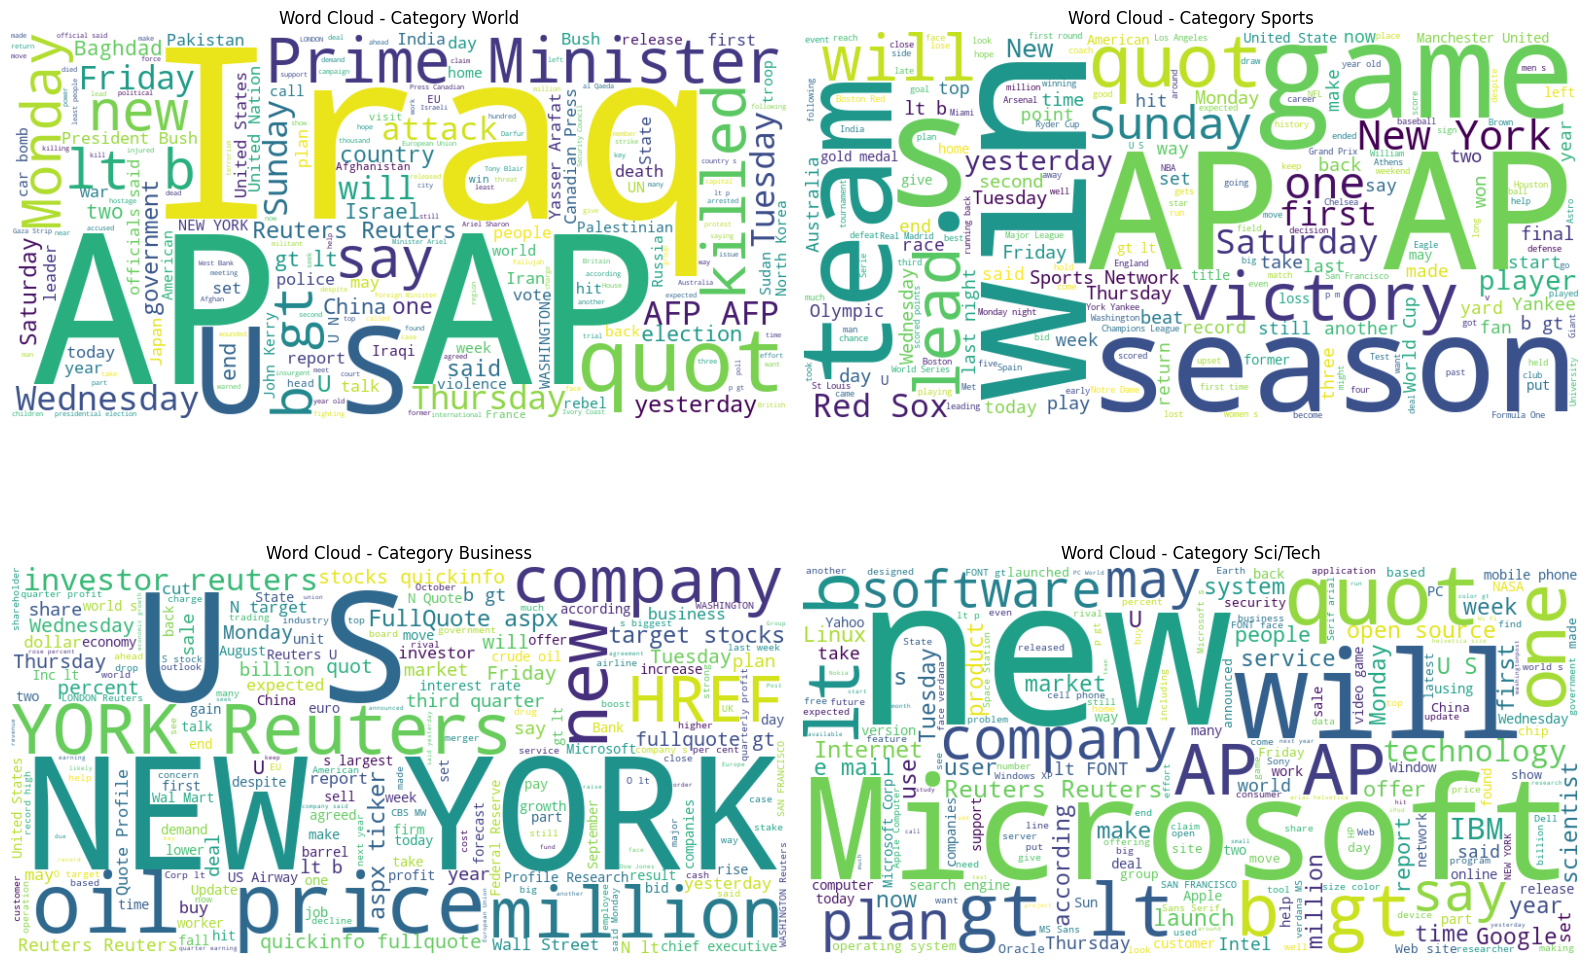

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, cat in enumerate(class_labels):
    text_1 = '\n'.join(train_df[train_df['Class Index'] == idx+1]['Original_Text'])
    text_2 = '\n'.join(test_df[test_df['Class Index'] == idx+1]['Original_Text'])
    full_text = text_1 + ' ' + text_2
    wc = WordCloud(width=800, height=400, background_color='white').generate(full_text)
    ax = axes[idx // 2, idx % 2]
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"Word Cloud - Category {cat}")
plt.tight_layout()
plt.show()

# Feed Forward Neural Network

In [204]:
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train_oh = to_categorical(y_train-1, num_classes=4)
y_val_oh = to_categorical(y_val-1, num_classes=4)
y_test_oh = to_categorical(y_test-1, num_classes=4)

def tfidf_generator(X, y, batch_size=32):
    n_samples = X.shape[0]
    while True:
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size].toarray().astype(np.float32)
            y_batch = y[i:i+batch_size].astype(np.float32)
            yield X_batch, y_batch

train_gen = tfidf_generator(X_train, y_train_oh, batch_size=32)
val_gen   = tfidf_generator(X_val,   y_val_oh,   batch_size=32)
steps_per_epoch = int(np.ceil(X_train.shape[0] / 32))
val_steps = int(np.ceil(X_val.shape[0] / 32))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=10,
    verbose=1
)

Epoch 1/10
3000/3000 [==============================] - 41s 14ms/step - loss: 0.3661 - accuracy: 0.8752 - precision_9: 0.9088 - recall_9: 0.8481 - val_loss: 0.2418 - val_accuracy: 0.9225 - val_precision_9: 0.9309 - val_recall_9: 0.9137
Epoch 2/10
3000/3000 [==============================] - 41s 14ms/step - loss: 0.1753 - accuracy: 0.9424 - precision_9: 0.9464 - recall_9: 0.9383 - val_loss: 0.2682 - val_accuracy: 0.9200 - val_precision_9: 0.9240 - val_recall_9: 0.9166
Epoch 3/10
3000/3000 [==============================] - 41s 14ms/step - loss: 0.1078 - accuracy: 0.9630 - precision_9: 0.9649 - recall_9: 0.9612 - val_loss: 0.3314 - val_accuracy: 0.9162 - val_precision_9: 0.9182 - val_recall_9: 0.9144
Epoch 4/10
3000/3000 [==============================] - 41s 14ms/step - loss: 0.0677 - accuracy: 0.9760 - precision_9: 0.9770 - recall_9: 0.9750 - val_loss: 0.4190 - val_accuracy: 0.9143 - val_precision_9: 0.9157 - val_recall_9: 0.9131
Epoch 5/10
3000/3000 [==============================] - 

In [ ]:
from sklearn.metrics import classification_report

def predict_and_report(model, X_test, y_test, batch_size=32):
    y_pred_probs = model.predict(X_test.toarray(), batch_size=batch_size)
    y_pred = y_pred_probs.argmax(axis=1) + 1  #because labels start from 1
    print(classification_report(y_test, y_pred, target_names=class_labels))

predict_and_report(model, X_test, y_test)

238/238 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

       World       0.89      0.91      0.90      1900
      Sports       0.97      0.95      0.96      1900
    Business       0.86      0.87      0.87      1900
    Sci/Tech       0.88      0.87      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



# Notebook Summary & Key Insights

## Summary
This notebook demonstrates a complete workflow for news category classification using the AG News dataset. The steps include data loading, preprocessing (including text cleaning and lemmatization), feature extraction with TF-IDF, model selection (Logistic Regression and LightGBM), and deep learning with a feed-forward neural network. Visualization techniques such as word clouds and feature importance bar charts are used to interpret the data and model.

## Key Insights
- **Data Distribution:** The dataset is balanced across four categories: World, Sports, Business, and Sci/Tech.
- **Text Preprocessing:** Cleaning and lemmatization significantly reduce vocabulary size and improve model performance.
- **Feature Importance:** Top TF-IDF features and model coefficients highlight the most discriminative words for each category.
- **Model Performance:** Both classical ML models and neural networks achieve high accuracy, with detailed classification reports for each category.
- **Visualization:** Word clouds and bar plots provide intuitive insights into the most frequent and important words per category.

## Recommendations
- Further hyperparameter tuning and model ensembling may improve results.
- Consider using more advanced NLP models (e.g., transformers) for even better accuracy.
- Explore misclassified samples to understand model limitations and improve preprocessing.
